# 23708 Studio 1: Foundation
* Student: Laila Lima Alves

* Student ID: 14344509

## **Assignment 2**

## Import Libraries

In [1]:
# Import necessary libraries.
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pylab
from pylab import *


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To enable plotting graphs in Jupyter notebook
%matplotlib inline


<font color=darkblue>
    
# Loading and exploring the data


In [2]:
df = pd.read_excel("ADD YOUR PERSONAL FOLDER")

In [3]:
df.shape #The File has 365 Rows with Data AND 3 Columns

(365, 3)

In [4]:
len(df) # confirm the number of rows

365

In [5]:
df.columns #The Columns names are described below. Names are very long but will remain for this exercise.

Index(['Price/km driven', 'Requested kms driven', 'Friday or Saturday?'], dtype='object')

In [6]:
df.dtypes.value_counts() # Data is all numerical

float64    2
int64      1
dtype: int64

In [7]:
df.head(10) #Visually check the first 10 Rows

,Price/km driven,Requested kms driven,Friday or Saturday?
0,0.483153,516846.927978,0
1,0.816312,183687.956639,0
2,0.648484,351515.683378,0
3,0.443842,556157.503436,0
4,0.176625,823374.954876,0
5,0.737312,762688.288941,1
6,0.788366,711634.440127,1
7,0.556778,443222.125373,0
8,0.311402,688598.024706,0
9,0.442514,557486.478719,0


In [8]:
df.info()
# Check the characteristics of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price/km driven       365 non-null    float64
 1   Requested kms driven  365 non-null    float64
 2   Friday or Saturday?   365 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 8.7 KB


In [9]:
df.isnull().sum() 
#no missing values

Price/km driven         0
Requested kms driven    0
Friday or Saturday?     0
dtype: int64

In [10]:
df.describe() 
#These are the statistical values for numerical columns. 
# We can see the mean,standard deviation, minimum, maximum as well as first, second and third quantiles.

,Price/km driven,Requested kms driven,Friday or Saturday?
count,365.000000,3.650000e+02,365.000000
mean,0.475535,6.669309e+05,0.284932
std,0.296549,3.597324e+05,0.452001
min,0.007065,6.722621e+02,0.000000
25%,0.210910,4.020799e+05,0.000000
50%,0.438071,6.637552e+05,0.000000
75%,0.737626,8.932280e+05,1.000000
max,0.999328,1.481987e+06,1.000000


## 1. Use this dataset to plot the trends in prices and ride sharing requests across the year. Comment on the correlation between these trends.

### Correlation Matrix

The Matrix shows how much two variables works towards the same goal, a positive correlation shows if one increases the other will increase too. 
Negative correlation would be the opposite, if one variable increases, the other will decrease.
The values/numerical number show the proportion of this relation, if the correlation is one, the variables are perfect correlated, an increase of one point in one variable will result in the same increase for the second variable.
Correlation above 0.5 or below -0.5 are statistically relevant, otherwise they do not have a high effect. 

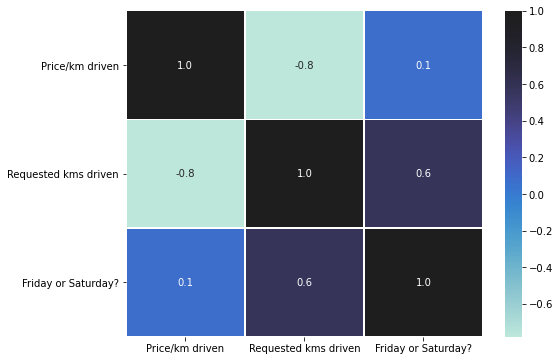

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

* The correlation matrix shows a strong negative correlation between Requested kms driven and Price/km driven. Which confirms that higher kms driven will turn into lower prices.
* The correlation between Requested kms driven and Weekend is 0.6, positive moderate level. Shows that weekends are characteriyed by longer trips than weekdays. 
* The lowest correlation is between Weekend and Price/km driven, almost no correlationn between the variables.

### Scatterplot



The Scatterplot below confirms the findings above. Hence we can see two colors in the graph, showing that the prices on the weekends are much higher than prices on the weekdays. The price/kms driven decline both weekends and weekdays as the distance of the drive increases.

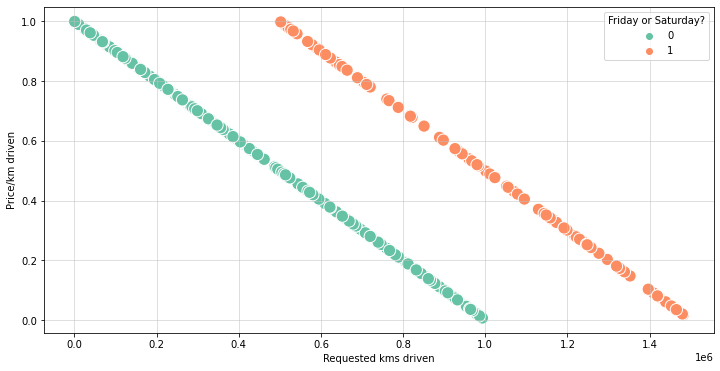

In [12]:
plt.figure(figsize=(12,6))

sns.scatterplot(x="Requested kms driven", y="Price/km driven", data=df, hue=df['Friday or Saturday?'], palette="Set2", s=150)
plt.grid(b=True, which='major', color='silver', linewidth=0.5)
plt.grid(b=True, which='minor', color='silver', linewidth=0.5)
plt.show()

## 2. Now use this dataset to draw a demand curve for the industry.

The graph above indicates that there is a demand curve for weekdays and another demand curve for weekends, they are paralel and have the same inclination. To draw a demand curve for the entire industry it is necessary to merge the figures and draw a trendline.

Equation Trendline y=-0.000000642x+(0.903997)


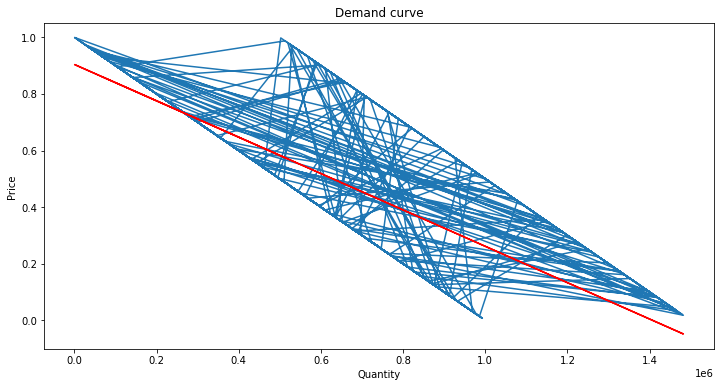

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df['Requested kms driven'],df['Price/km driven'], label = "Demand Curve" )
plt.title("Demand curve")
plt.xlabel("Quantity")
plt.ylabel("Price")

# calc the trendline
z = np.polyfit(df['Requested kms driven'], df['Price/km driven'], 1)
p = np.poly1d(z)
pylab.plot(df['Requested kms driven'],p(df['Requested kms driven']),"r-")
# the line equation:
print ("Equation Trendline","y=%.9fx+(%.6f)"%(z[0],z[1]))

The demand curve will be the trendline between weekdays and weekend, which is represented by the red line above. The Equation of the demand curve is also available.

## 3. Without looking at the data, do you expect demand to be higher on Friday or Saturday than other days? Write down your prediction and explain why. Then test your prediction with the data. What do you conclude?

* Considering that each row in this dataset corresponds to a day of the year. The demand in number of rides should be higher on weekdays because there are more weekdays than weekends in a year.
* A year has 365 days and 52 weeks.
* A weenkends in a year are 2 days which results in 104 days in a year.
* Weekday are therefore 261 days in a year.
* The Graph below shows these figures and confirms that each row in this dataset corresponds to a day of the year.

In [14]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

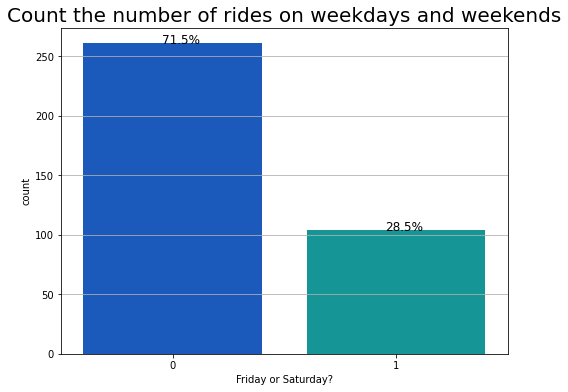

In [29]:
plt.figure(figsize=(8, 6))
plt.title('Count the number of rides on weekdays and weekends', fontsize=20)
plt.grid()
ax = sns.countplot(df["Friday or Saturday?"], palette="winter")
perc_on_bar(ax, df["Friday or Saturday?"])
plt.show()

* The Graph below show that the Weekends are characterized by more kms driven than weekdays

* While Weekdays have most of the rides below 0.9 kms, the weekends are concentrated above 0.6 kms.

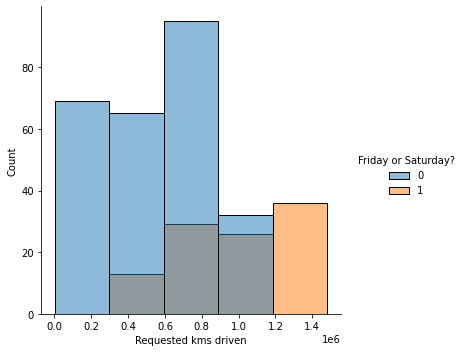

In [16]:
sns.displot(df, x="Requested kms driven", hue="Friday or Saturday?", bins = 5)

The next graph sums the Requested kms driven per Weekdays & Weekends. Despite the fact that Weekends only represent 28.5% days of the year. The total kms driven is proportionally higher on weekdays.
* Weekends represent 42.3% of the total kms driven in a year, compared to Weekdays 57.7%. 

In [33]:
bc = df.groupby(by=['Friday or Saturday?'])['Requested kms driven'].sum().reset_index().sort_values(['Requested kms driven'],
                    ascending=True)

bc

,Friday or Saturday?,Requested kms driven
1,1,1.030462e+08
0,0,1.403836e+08


In [41]:
list = bc['Requested kms driven'].tolist()
print(list)

[103046189.5554018, 140383598.869253]


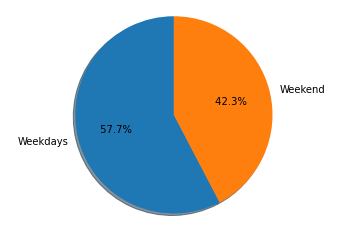

In [42]:
a = [140383598, 103046189]
b = ['Weekdays', 'Weekend']
fig1 , ax1 = plt . subplots ()
ax1 . pie ( a , labels = b , autopct = ' %1.1f%% ' , shadow = True , startangle = 90 )

ax1 . axis ( 'equal' ) # Equal aspect ratio ensures that pie is drawn as a circle.

plt . show ()

## 4. Smart Ride’s data analysts have determined that its marginal cost curve is given by the equation MC = 0.0000004*Q where Q = kilometres driven. Smart Ride’s competitors currently charge consumers an average flat rate of $0.5 per kilometre driven.

In [20]:
df['MC']=0.0000004*df['Requested kms driven'] # Calculting the marginal costs and include in the Data Frame

In [21]:
df['MR'] = 0.5 # Creating the Marginal Revenue column and include in the Data Frame

In [22]:
df.head(10) # check visually

,Price/km driven,Requested kms driven,Friday or Saturday?,MC,MR
0,0.483153,516846.927978,0,0.206739,0.5
1,0.816312,183687.956639,0,0.073475,0.5
2,0.648484,351515.683378,0,0.140606,0.5
3,0.443842,556157.503436,0,0.222463,0.5
4,0.176625,823374.954876,0,0.329350,0.5
5,0.737312,762688.288941,1,0.305075,0.5
6,0.788366,711634.440127,1,0.284654,0.5
7,0.556778,443222.125373,0,0.177289,0.5
8,0.311402,688598.024706,0,0.275439,0.5
9,0.442514,557486.478719,0,0.222995,0.5


In [23]:
df = df.sort_values(by=['MC']) # Sort the values

In [24]:
df.describe() # calculate statistical values

,Price/km driven,Requested kms driven,Friday or Saturday?,MC,MR
count,365.000000,3.650000e+02,365.000000,365.000000,365.0
mean,0.475535,6.669309e+05,0.284932,0.266772,0.5
std,0.296549,3.597324e+05,0.452001,0.143893,0.0
min,0.007065,6.722621e+02,0.000000,0.000269,0.5
25%,0.210910,4.020799e+05,0.000000,0.160832,0.5
50%,0.438071,6.637552e+05,0.000000,0.265502,0.5
75%,0.737626,8.932280e+05,1.000000,0.357291,0.5
max,0.999328,1.481987e+06,1.000000,0.592795,0.5


In [25]:
#Since none of the MC values match perfectly the MR value of 0.5, let´s create a function to map the MC values that are close to the MR.
df.iloc[np.where((df['MC'] > 0.49) 
        & (df['MC'] < 0.51))]

,Price/km driven,Requested kms driven,Friday or Saturday?,MC,MR
103,0.270552,1.229448e+06,1,0.491779,0.5
48,0.263404,1.236596e+06,1,0.494638,0.5
110,0.253538,1.246462e+06,1,0.498585,0.5
355,0.252033,1.247967e+06,1,0.499187,0.5
222,0.242796,1.257204e+06,1,0.502882,0.5
124,0.240419,1.259581e+06,1,0.503832,0.5


## Assume that the ride share market is perfectly competitive. Draw Smart Ride's marginal revenue and marginal cost curves in a single diagram (it does not need to be to scale). Then calculate the optimal number of kilometres driven by Smart Ride's fleet if it is profit maximising. Given your answer to (3), do you think it makes sense that there is a single flat price on every day of the week? If not, what would you propose instead?


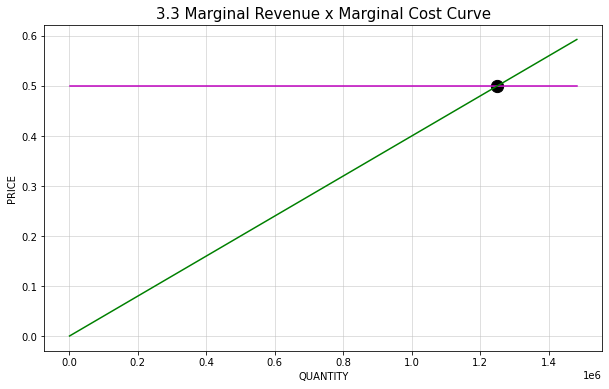

In [44]:
plt.figure(figsize=(10,6))
a = df['Requested kms driven']
#a = np.linspace(0, 1500000,365)
plt.xlabel("QUANTITY")
plt.ylabel("PRICE")
plt.title("3.3 Marginal Revenue x Marginal Cost Curve", size = 15)
plt.scatter((0.5/0.0000004), 0.5, color='black', s=150 )
plt.grid(b=True, which='major', color='silver', linewidth=0.5)
plt.grid(b=True, which='minor', color='silver', linewidth=0.5)
plt.plot(a, df['MR'], 'm', label = 'MR')
plt.plot(a, df['MC'], 'g', label = 'MC')


In [27]:
# optimal number of kilometres driven by Smart Ride's fleet if it is profit maximising
Opt = 0.5/0.0000004
Opt 

1250000.0

I do not think it makes sense that there is a single flat price on every day of the week, because if you have a fixed price and the Kms drive is higher than 1.250.000, your MC > MR and you will make a loss. The company will only make profit if the client rides less than 1.250.000 kms.

The Weekdays will probably be much more profitable with a fixed price, but the weekends will not be as good. 